### Exploratory Data Analysis

#### Most common words

In [40]:
import pandas as pd

In [41]:
data_dtm = pd.read_pickle("../data/docterm_matrix.pkl")
data_dtm = data_dtm.transpose()
data_dtm.head()

,left,right
aapi,0,2
aba,1,0
abandon,1,0
abandoned,0,1
abel,1,0


In [42]:
# Find top 30 words by each wing
top_dict = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

top_dict

{'left': [('biden', 42),
  ('people', 30),
  ('like', 27),
  ('new', 26),
  ('mr', 25),
  ('american', 22),
  ('government', 19),
  ('times', 18),
  ('google', 18),
  ('white', 17),
  ('percent', 16),
  ('editor', 16),
  ('political', 16),
  ('use', 15),
  ('democratic', 15),
  ('defense', 15),
  ('states', 15),
  ('spending', 15),
  ('president', 15),
  ('york', 15),
  ('work', 14),
  ('police', 14),
  ('think', 14),
  ('trump', 14),
  ('years', 13),
  ('infrastructure', 13),
  ('plan', 13),
  ('united', 13),
  ('china', 13),
  ('world', 12)],
 'right': [('biden', 66),
  ('click', 51),
  ('people', 48),
  ('just', 47),
  ('new', 46),
  ('like', 44),
  ('states', 42),
  ('news', 41),
  ('president', 40),
  ('georgia', 34),
  ('democrats', 34),
  ('infrastructure', 33),
  ('make', 32),
  ('women', 32),
  ('state', 31),
  ('united', 30),
  ('government', 28),
  ('american', 26),
  ('time', 25),
  ('billion', 25),
  ('relief', 24),
  ('going', 23),
  ('think', 22),
  ('power', 21),
  ('ob

In [43]:
# Top 15 words by each wing
for w, top_words in top_dict.items():
    print(w)
    print(' '.join([word for word, count in top_words[0:14]]))

left
biden people like new mr american government times google white percent editor political use
right
biden click people just new like states news president georgia democrats infrastructure make women


#### Word clouds

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction import text

In [45]:
# Get stop words
stop_words = text.ENGLISH_STOP_WORDS
len(stop_words)

318

In [46]:
wc = WordCloud(stopwords=stop_words, background_color="white",
              colormap="Dark2", max_font_size=150, random_state=40)

In [47]:
# Read in cleaned data
data_clean = pd.read_pickle('../data/corpus.pkl')

In [48]:
data_clean

,content,wing
left,hey we’ve got our first political sex scandal ...,left
right,her names nicolle and shes quite a troll nicol...,right


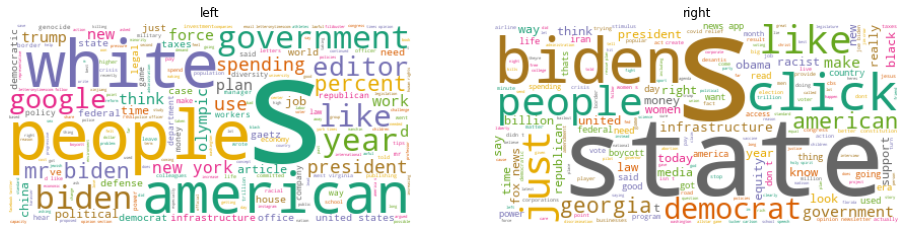

In [49]:
# Show word cloud
plt.rcParams['figure.figsize'] = [16, 6]
full_names = ["left", "right"]
for index, wing in enumerate(data_dtm.columns):
    wc.generate(data_clean.content[wing])
    plt.subplot(1,2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()